<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{1}$

We assume that the data is linearly separable. Let $C$ be the convex hull of $\{x_n\}$ and $C'$ to be the convex hull of $\{x_m'\}$. Suppose we choose $\mathbf{x} \in C$ with weights $\pmb{\alpha}$, and $\mathbf{x}' \in C'$ with weights $\pmb{\alpha}'$ arbitrarily.

Then, by definition,
$$
\begin{align*}
\mathbf{w}^T \mathbf{x} + w_0 &= \mathbf{w}^T \left(\sum_{n} \alpha_n \mathbf{x}_n\right) + w_0 \\
&= \left(\sum_{n} \alpha_n(\mathbf{w}^T \mathbf{x}_n)\right) + w_0 \\
&> \left(\sum_n \alpha_n (-w_0)\right) + w_0 \\
&= -w_0\left(\sum_n \alpha_n \right) + w_0 \\
&= -w_0 + w_0 \\
&= 0.
\end{align*}
$$

Similarly, by definition,
$$
\begin{align*}
\mathbf{w}^T \mathbf{x}' + w_0 &= \mathbf{w}^T \left(\sum_{m} \alpha_m' \mathbf{x}_m\right) + w_0 \\
&= \left(\sum_{m} \alpha_m'(\mathbf{w}^T \mathbf{x}_m)\right) + w_0 \\
&< \left(\sum_m \alpha_m' (-w_0)\right) + w_0 \\
&= -w_0\left(\sum_m \alpha_m' \right) + w_0 \\
&= -w_0 + w_0 \\
&= 0.
\end{align*}
$$

Thus, we have shown that for any $\mathbf{x} \in C$ and $\mathbf{x}' \in C'$, $\mathbf{x} \neq \mathbf{x}'$ since $\mathbf{w}^T \mathbf{x} + w_0$ cannot be both positive and negative (since the inequalities are strict). Thus, the two convex hulls cannot intersect.

Note another way to interpret this is to say that every element of $C$ is on the positive side of the decision boundary, and every element of $C'$ is on the negative side of the decision boundary. This is another way to say that $C$ and $C'$ cannot intersect, since there are no points that could be on the positive and negative side of the boundary.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{2.a}$

$\mathcal{H}_1$ is a version of the set of half-spaces without a constant in $\mathbb{R}^p$. Thus the VC dimension is $p+1$.

$\mathcal{H}_2$ is a version of the set of half-spaces but for the new kernel. For the dimension of the feature set, we have (counting linearly independent terms) ${p+1 \choose 2}$ quadratics, $p$ linears, and $1$ constant, so the dimension of the feature set is ${p+1 \choose 2} + p + 1 = {p+2 \choose 2}$. Thus the VC dimension is ${p+2 \choose 2} + 1$.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{2.b}$

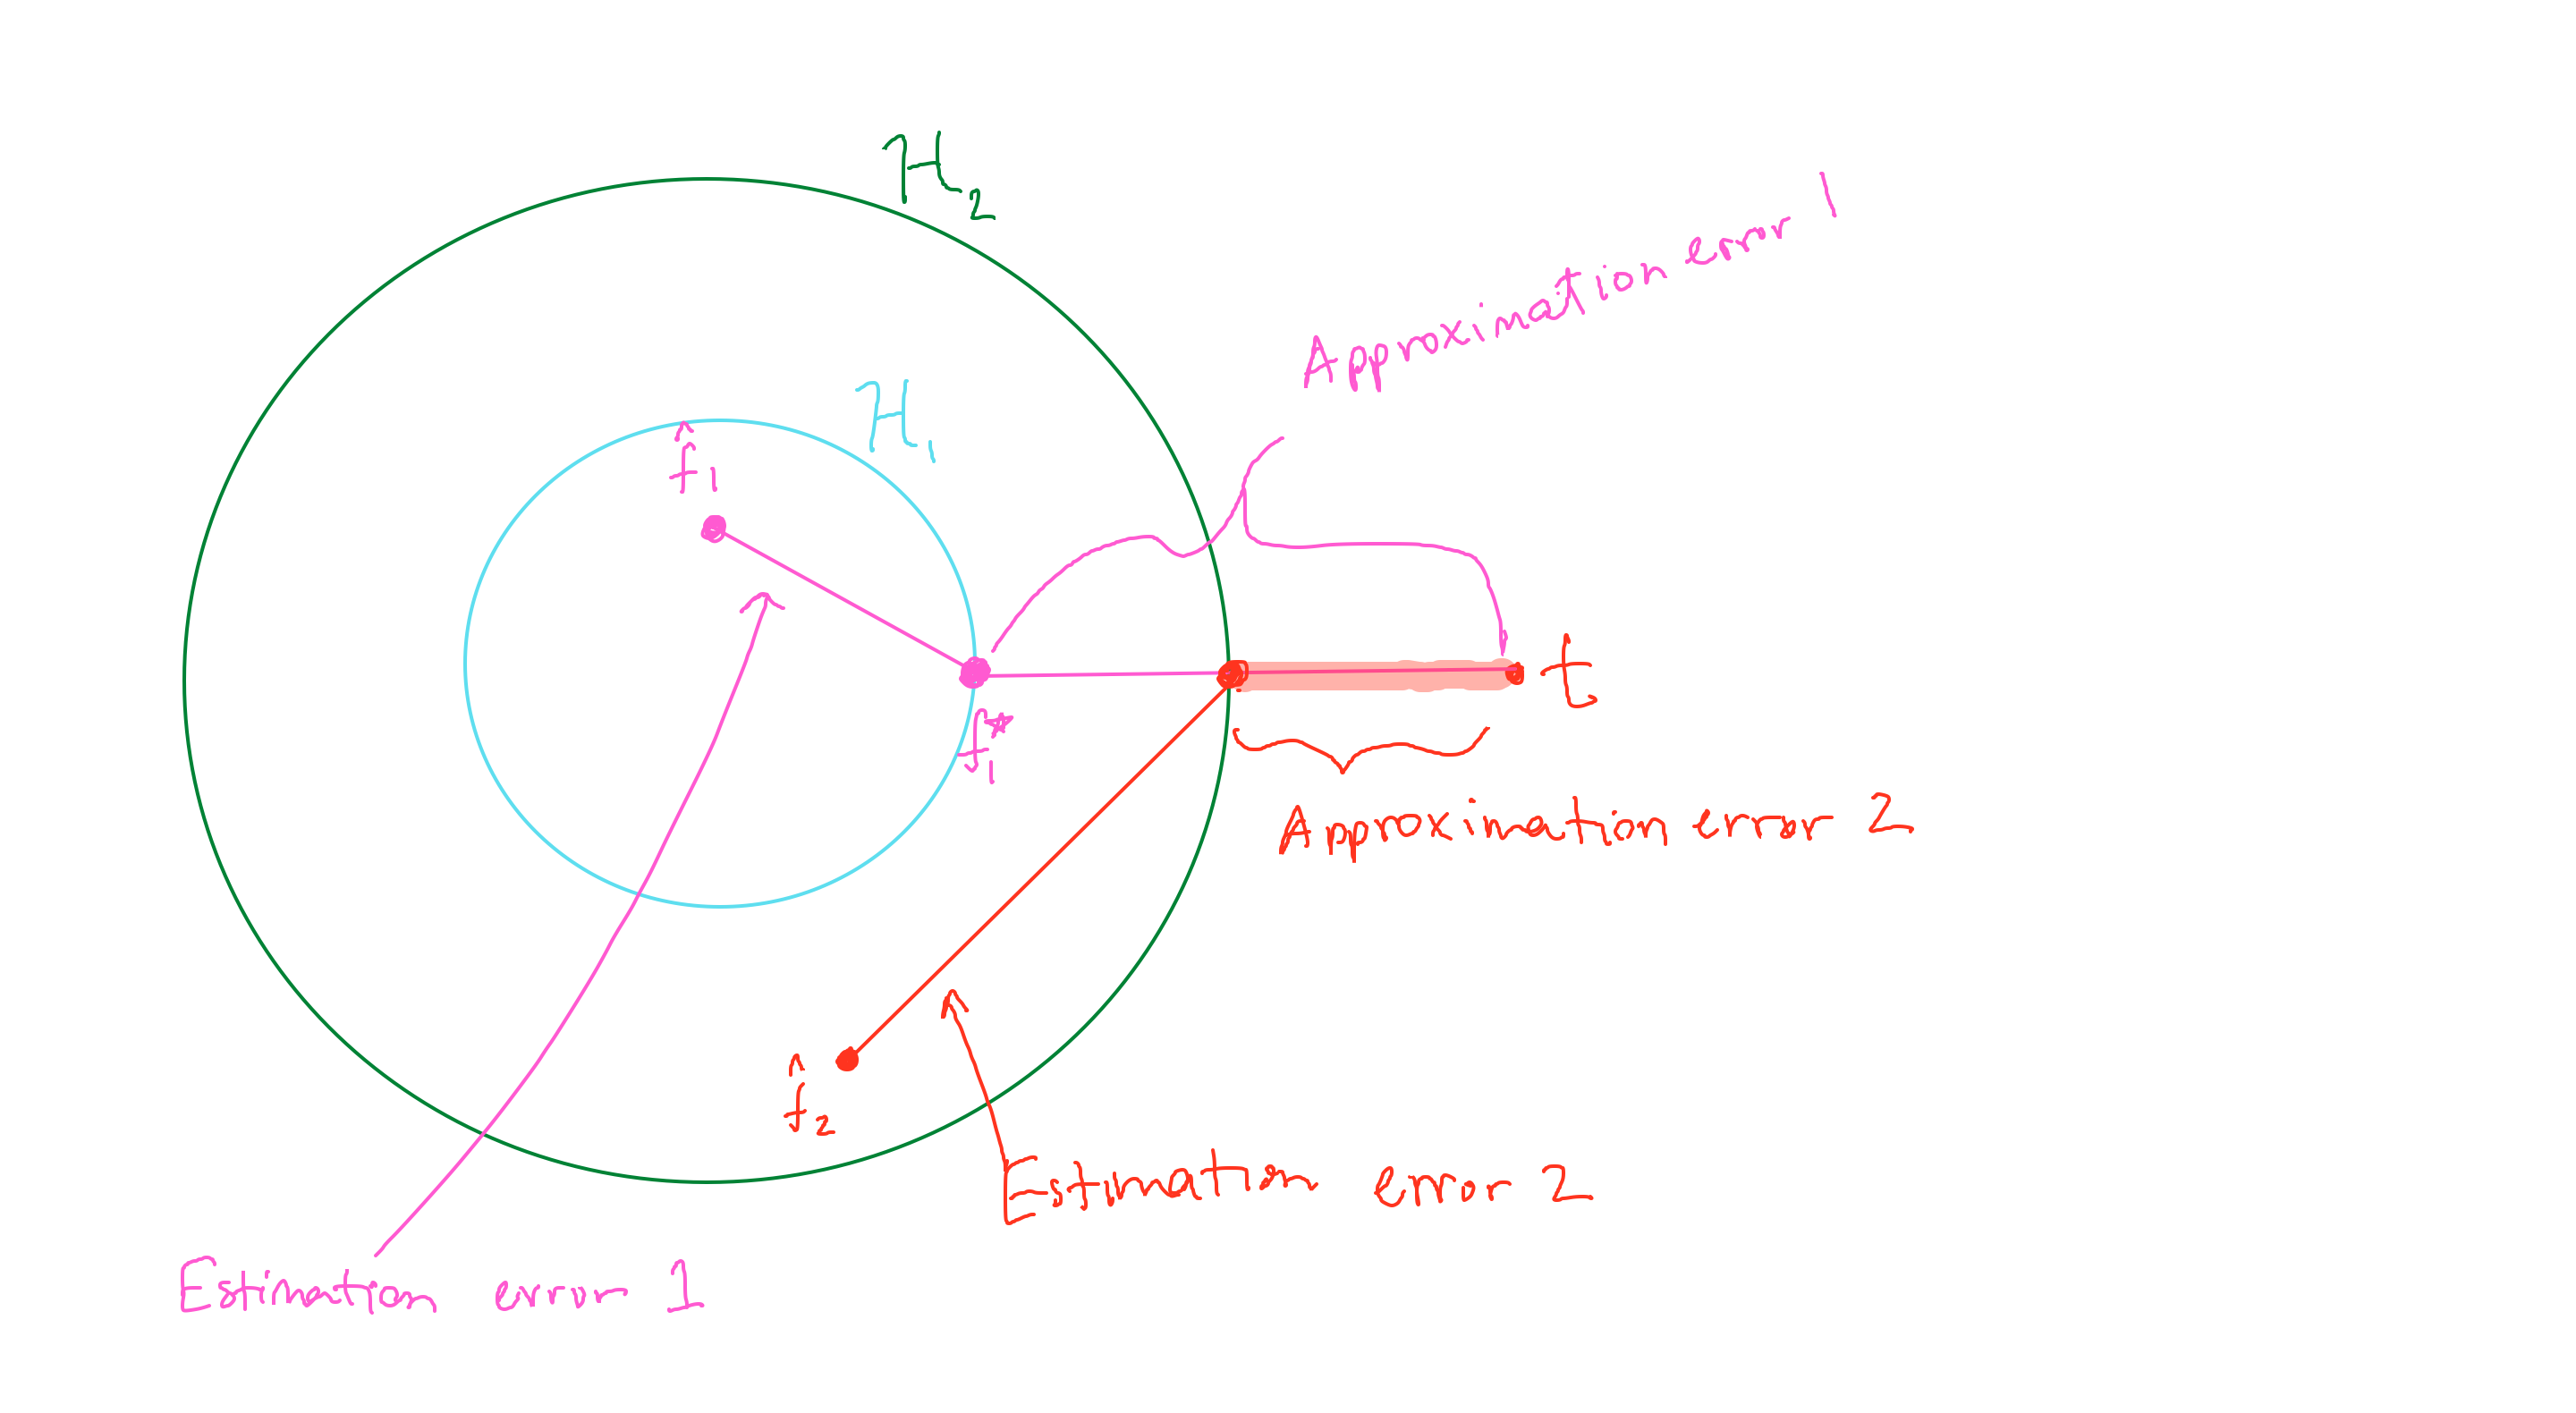

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{3.1}$

$\large \mathbf{Toy \; Dataset}$

$\large \mathbf{1}$

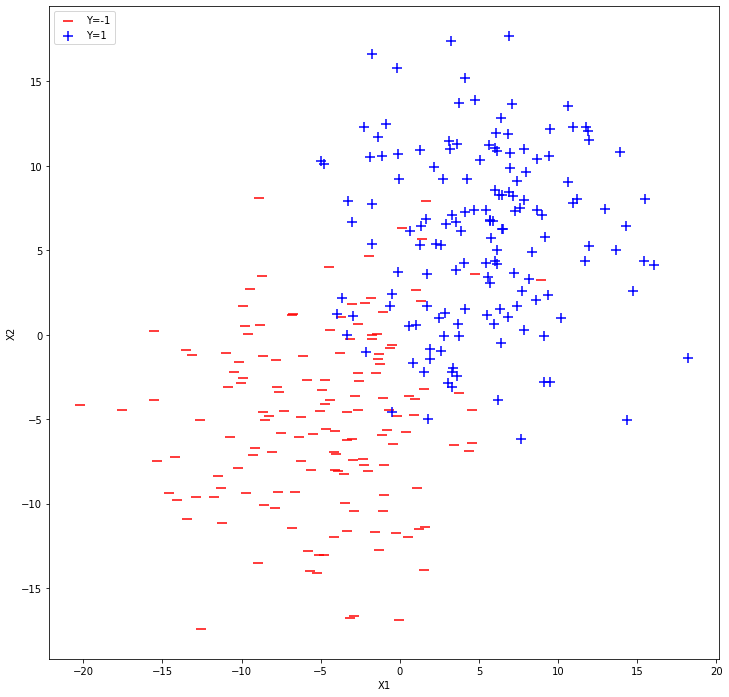

In [2]:
import sys
import math
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm.svmutil import *

# help(svm_predict)

# generate training set
X_neg = np.random.normal(-5,5,(150,2))
X_pos = np.random.normal(5,5,(150,2))

# combine to get X
X = np.array([obs for obs in X_neg] + [obs for obs in X_pos])

# Y should be first 150 negatives, second 150 positives
Y = np.array([-1 for i in range(150)] + [1 for i in range(150)])

plt.figure(figsize=(12,12))
plt.scatter(X[:150,0], X[:150,1], c='r', marker = "_", label='Y=-1', s=100)
plt.scatter(X[150:,0], X[150:,1], c='b', marker = "+", label='Y=1', s=100)
plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{2}$

In [2]:
# create kernel function: takes vector and returns gaussian kernel
def rbf(x, sigma_sq):
    return math.exp(-(norm(x)**2)/(sigma_sq))

In [3]:
from sklearn.model_selection import train_test_split

# split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

# save positives and negatives separately, to draw them easily later (don't need y's)
X_train_pos = []
X_test_pos = []
# Y_train_pos = []
# Y_test_pos = []
X_train_neg = []
X_test_neg = []
# Y_train_neg = []
# Y_test_neg = []

# save limits for the meshgrid
X1_min = sys.maxsize
X1_max = -sys.maxsize
X2_min = sys.maxsize
X2_max = -sys.maxsize

for i in range(len(X_train)):
    if(X_train[i][0] <= X1_min):
        X1_min = X_train[i][0]
    if(X_train[i][0] >= X1_max):
        X1_max = X_train[i][0]
    if(X_train[i][1] <= X2_min):
        X2_min = X_train[i][1]
    if(X_train[i][1] >= X2_max):
        X2_max = X_train[i][1]
        
    if (Y_train[i] > 0):
        X_train_pos.append(X_train[i])
#         Y_train_pos.append(Y_train[i])
    else:
        X_train_neg.append(X_train[i])
#         Y_train_neg.append(Y_train[i])
        
for i in range(len(X_test)):
    if (Y_test[i] > 0):
        X_test_pos.append(X_test[i])
#         Y_test_pos.append(Y_test[i])
    else:
        X_test_neg.append(X_train[i])
#         Y_test_neg.append(Y_test[i])

X_train_pos = np.array(X_train_pos)
X_test_pos = np.array(X_test_pos)
# Y_train_pos = np.array(Y_train_pos)
X_train_neg = np.array(X_train_neg)
X_test_neg = np.array(X_test_neg)
# Y_train_neg = np.array(Y_train_neg)

# save easier limits by rounding
X1_min = 5*math.floor(X1_min/5)
X1_max = 5*math.ceil(X1_max/5)
X2_min = 5*math.floor(X2_min/5)
X2_max = 5*math.ceil(X2_max/5)

X1_points = np.linspace(X1_min, X1_max, (X1_max - X1_min)*2)
X2_points = np.linspace(X2_min, X2_max, (X2_max - X2_min)*2)
X1, X2 = np.meshgrid(X1_points, X2_points)

# save sigmas to use
sigma_sqs = [1,2,4,8,16,32,64,128]
num_supp_vecs = [0,0,0,0,0,0,0,0]

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{3} \quad \text{and} \quad \mathbf{4}$

In [4]:
# calculates and draws the contours
def drawer_rbf(sigma_sq):
    # train with training data, sigma = sigma_sq
    problem = svm_problem(Y_train, X_train)
    params = svm_parameter('-s 0 -t 2 -g ' + str(1/sigma_sq))
    m = svm_train(problem, params)

    # set intercept first
    cons = -m.rho.contents.value

    # get support vectors (the only points that have nonzero alpha)
    # make into array to compare
    supp_vecs = np.array([np.array([sv[i] for i in sv.keys()]) for sv in m.get_SV()])
    dual_coefs = np.array([alpha[0] for alpha in m.get_sv_coef()])

    # initialize f to be the constant at each grid point
    f = np.ones((len(X1_points), len(X2_points)))*cons

    # evaluate function at each point
    for i in range(len(supp_vecs)):
        for j in range(len(X1_points)):
            for k in range(len(X2_points)):
                x_vec = np.array([X1_points[j], X2_points[k]])
                f[j][k] = f[j][k] + dual_coefs[i]*rbf((x_vec - supp_vecs[i]), sigma_sq)

    # not_sv = np.array(not_sv)
    # show non-supp-vecs on the plot, to be sure that they exist
    # not_sv = []
    # for x in X_train:
    #     if not (x in supp_vecs):
    #         not_sv.append(x)
    
    plt.figure(figsize=(20,20))
    plt.contourf(X1, X2, np.transpose(f), cmap='Blues')
    CS_zero = plt.contour(X1, X2, np.transpose(f), levels=0, colors='xkcd:pink')
    plt.scatter(supp_vecs[:,0], supp_vecs[:,1], marker='o', s=200, alpha = 0.5, edgecolors='g', facecolors='none', label='SVs')
    plt.clabel(CS_zero, CS_zero.levels, inline = True, colors = 'black')
    # plt.scatter(not_sv[:,0], not_sv[:,1], marker='o', s=200, edgecolors='tab:pink', facecolors='none', label='not SV')

    plt.scatter(X_train_neg[:,0], X_train_neg[:,1], c='xkcd:yellow', marker = "_", label='TRAIN Y=-1', s=100)
    plt.scatter(X_train_pos[:,0], X_train_pos[:,1], c='xkcd:yellow', marker = "+", label='TRAIN Y=1', s=100)
    plt.scatter(X_test_neg[:,0], X_test_neg[:,1], c='r', marker = "_", label='TEST Y=-1', s=100)
    plt.scatter(X_test_pos[:,0], X_test_pos[:,1], c='r', marker = "+", label='TEST Y=1', s=100)
    plt.legend(loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    print("Accuracy on Training:")
    train_pred_labels, p_acc, p_val = svm_predict(Y_train, X_train, m)
    train_acc, MSE, SCC = evaluations(Y_train, train_pred_labels)
    print()

    print("Accuracy on Test:")
    test_pred_labels, p_acc, p_val = svm_predict(Y_test, X_test, m)
    test_acc, MSE, SCC = evaluations(Y_test, test_pred_labels)
    print()
    
    return len(supp_vecs)

RBF Kernel with sigma^2 = 1


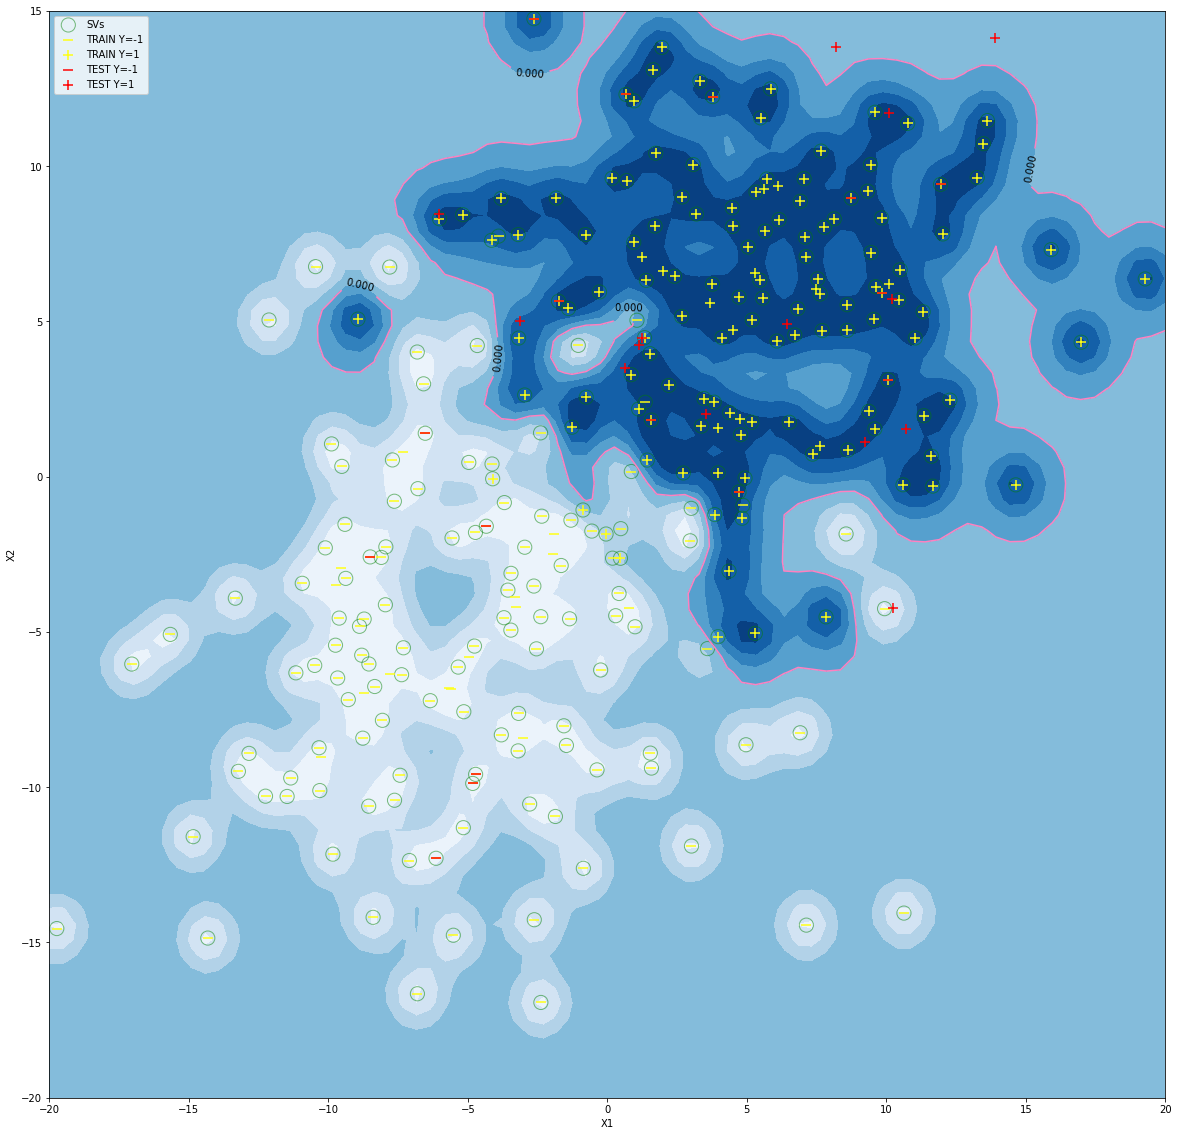

Accuracy on Training:
Accuracy = 97.4074% (263/270) (classification)

Accuracy on Test:
Accuracy = 90% (27/30) (classification)




RBF Kernel with sigma^2 = 2


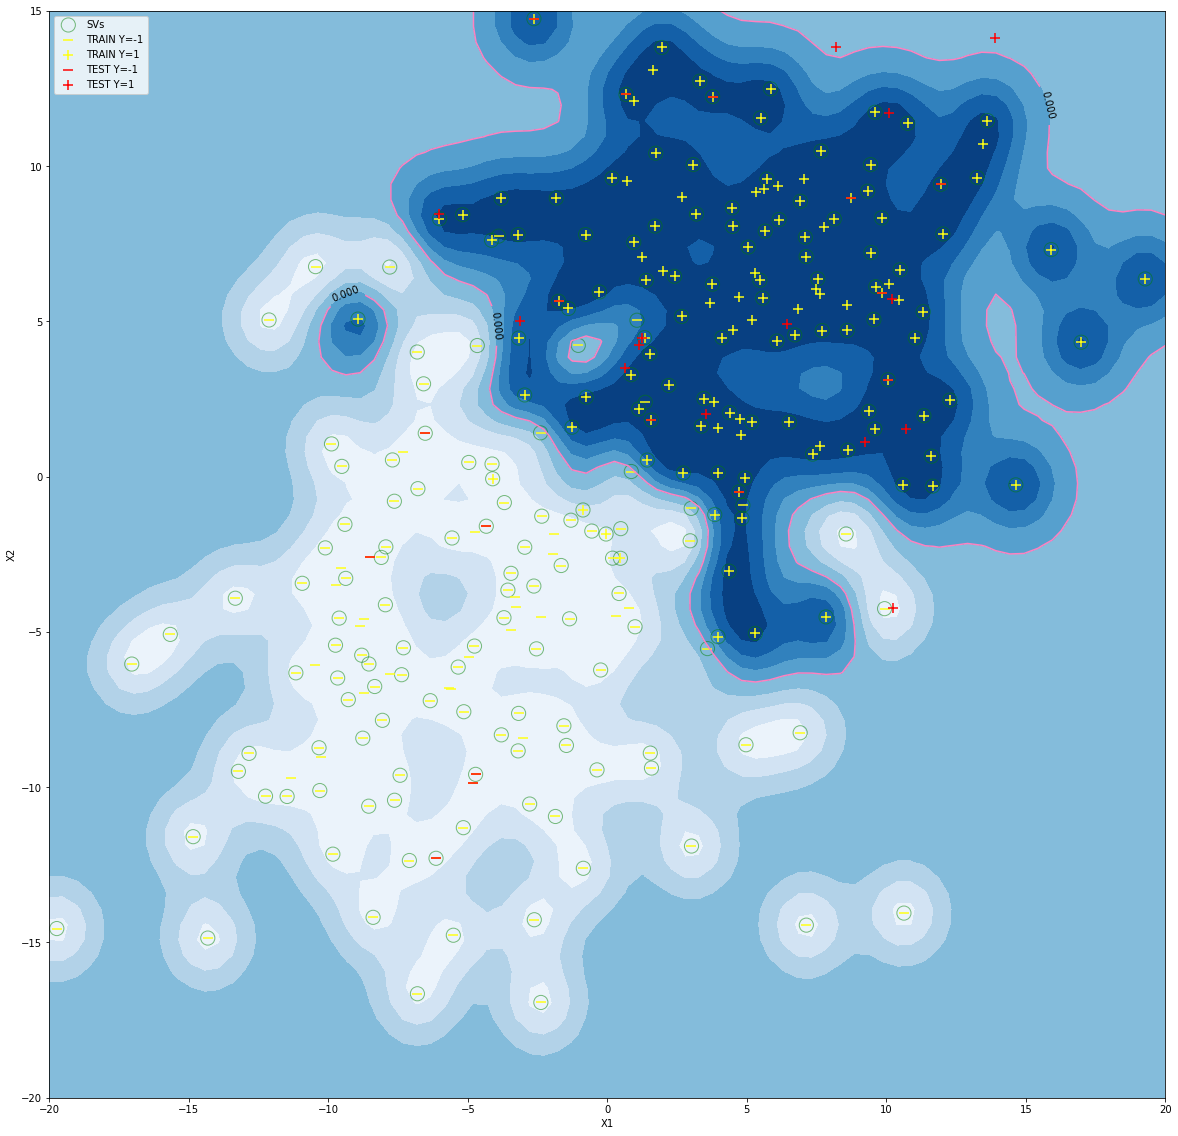

Accuracy on Training:
Accuracy = 97.037% (262/270) (classification)

Accuracy on Test:
Accuracy = 86.6667% (26/30) (classification)




RBF Kernel with sigma^2 = 4


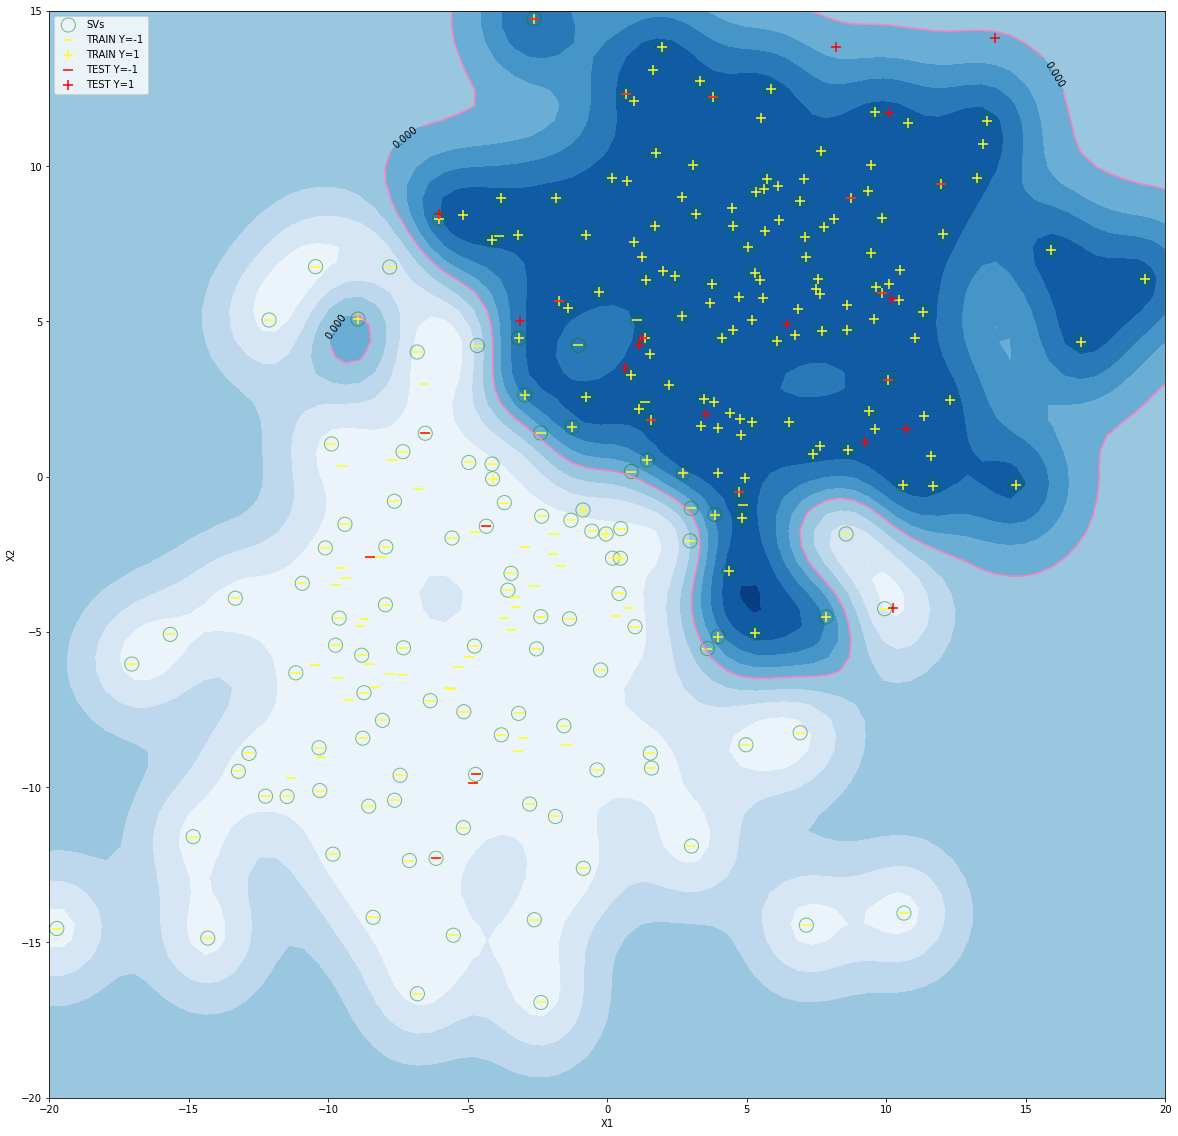

Accuracy on Training:
Accuracy = 95.1852% (257/270) (classification)

Accuracy on Test:
Accuracy = 93.3333% (28/30) (classification)




RBF Kernel with sigma^2 = 8


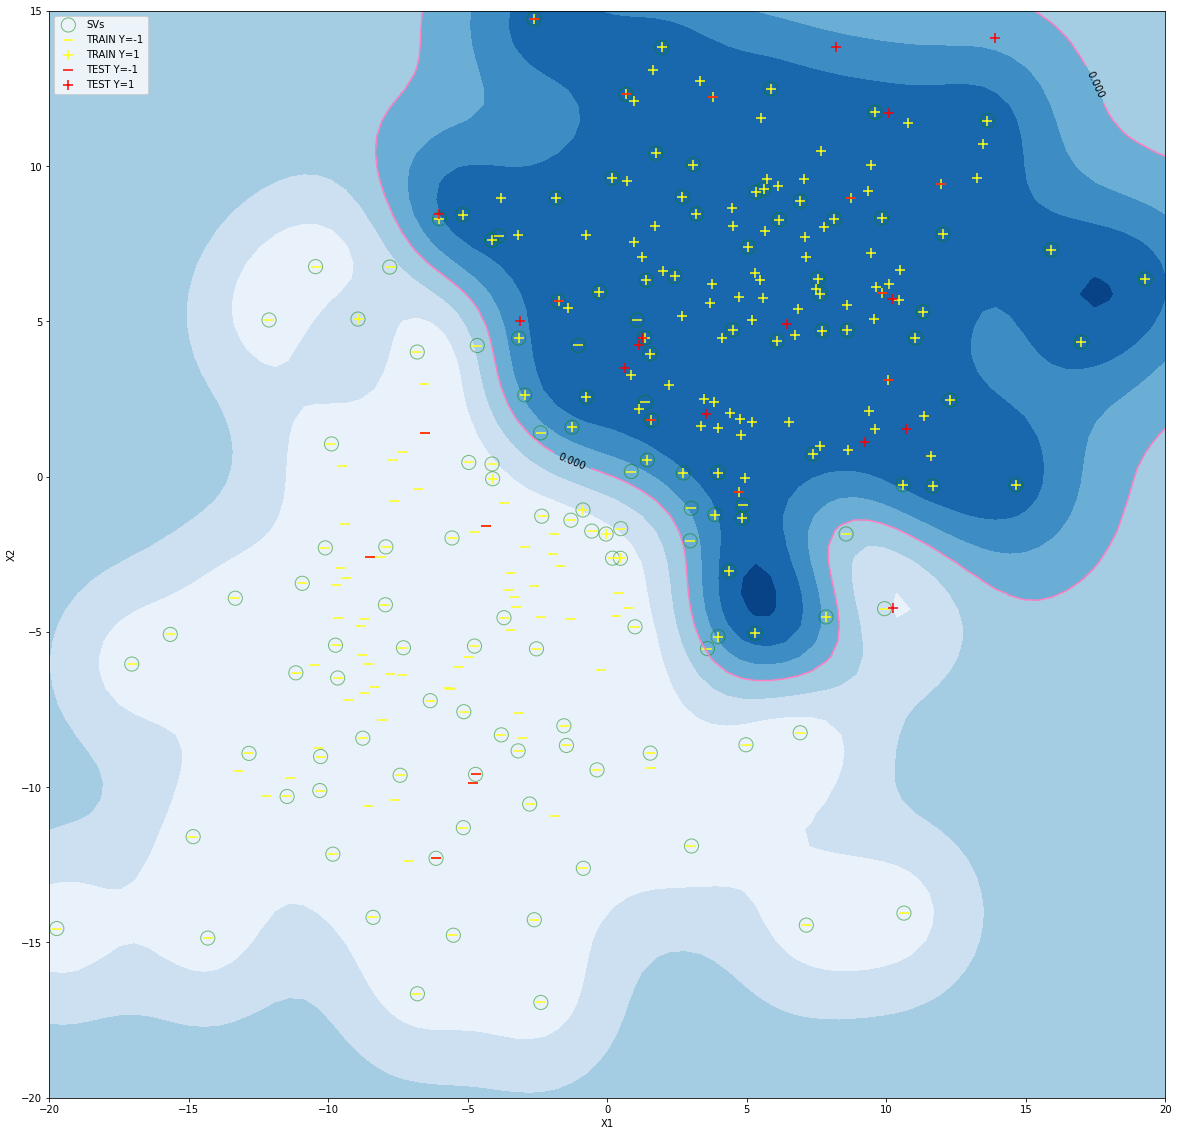

Accuracy on Training:
Accuracy = 94.4444% (255/270) (classification)

Accuracy on Test:
Accuracy = 93.3333% (28/30) (classification)




RBF Kernel with sigma^2 = 16


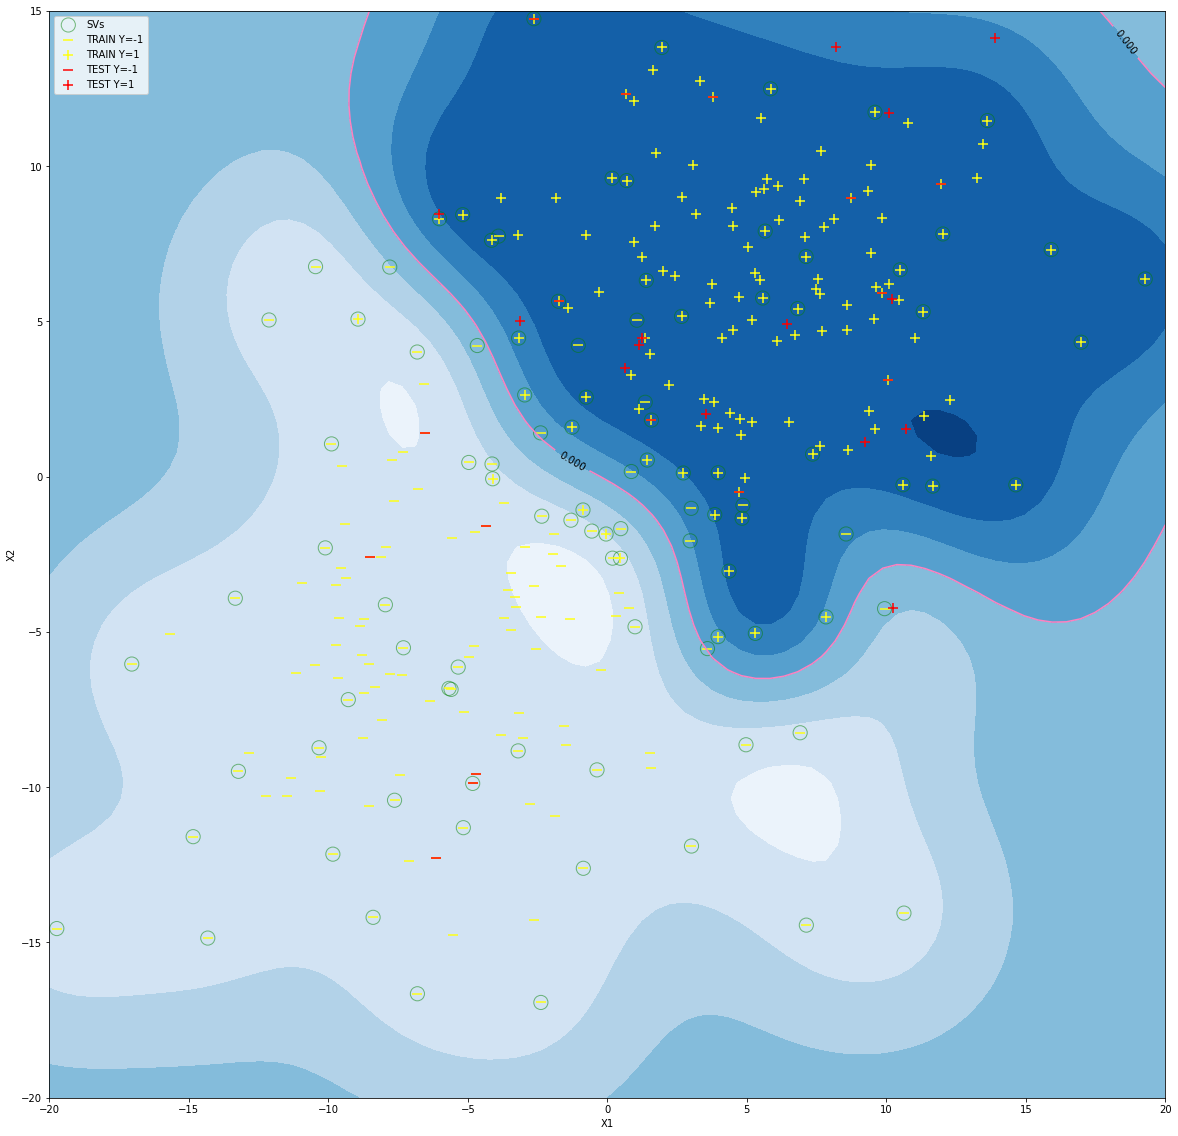

Accuracy on Training:
Accuracy = 94.0741% (254/270) (classification)

Accuracy on Test:
Accuracy = 93.3333% (28/30) (classification)




RBF Kernel with sigma^2 = 32


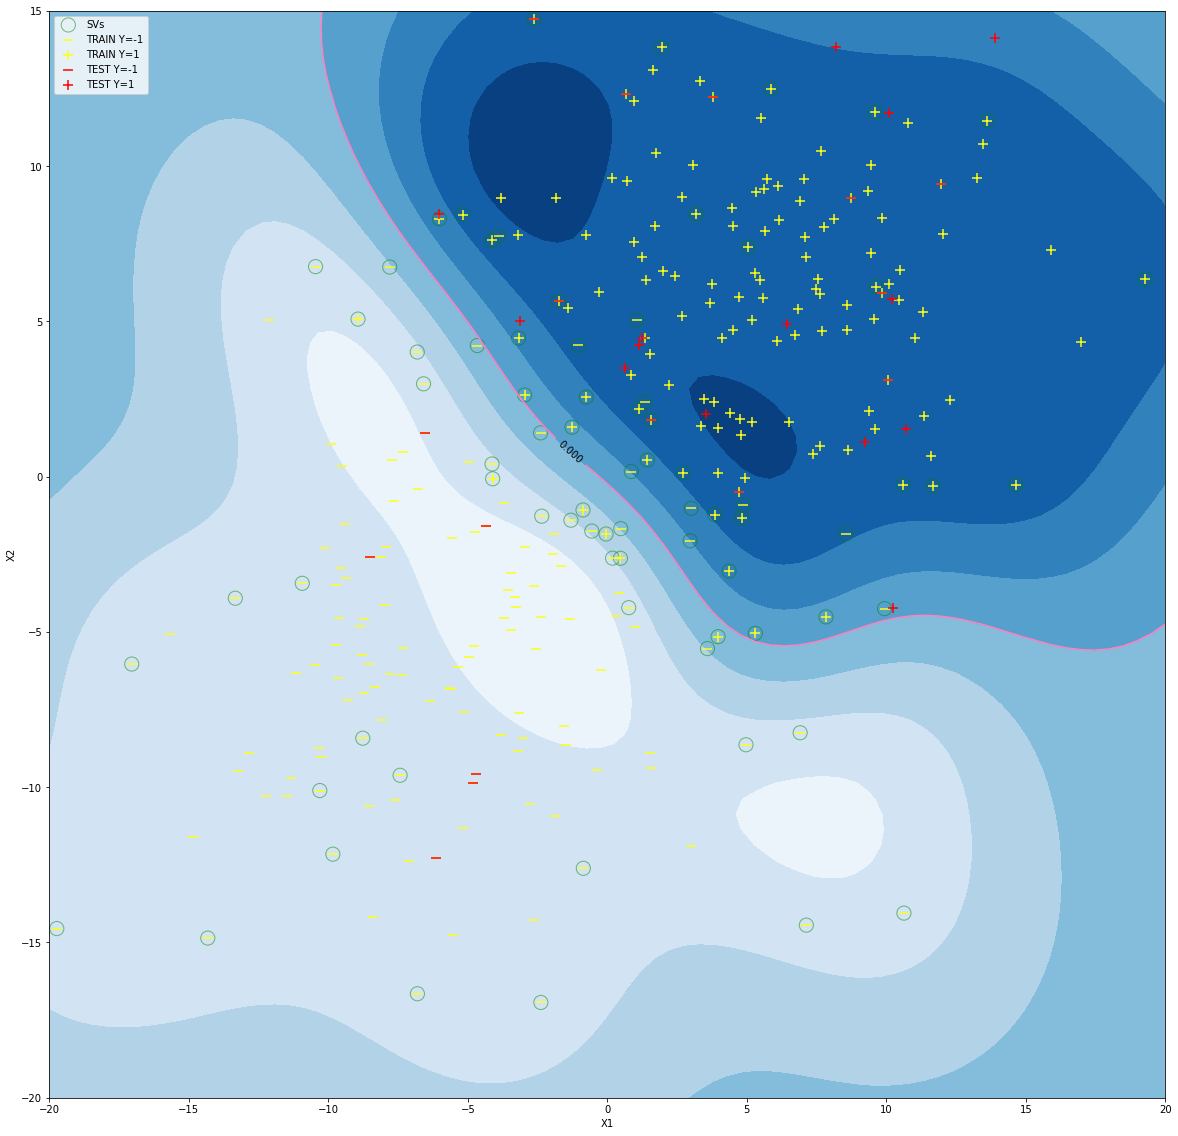

Accuracy on Training:
Accuracy = 94.0741% (254/270) (classification)

Accuracy on Test:
Accuracy = 96.6667% (29/30) (classification)




RBF Kernel with sigma^2 = 64


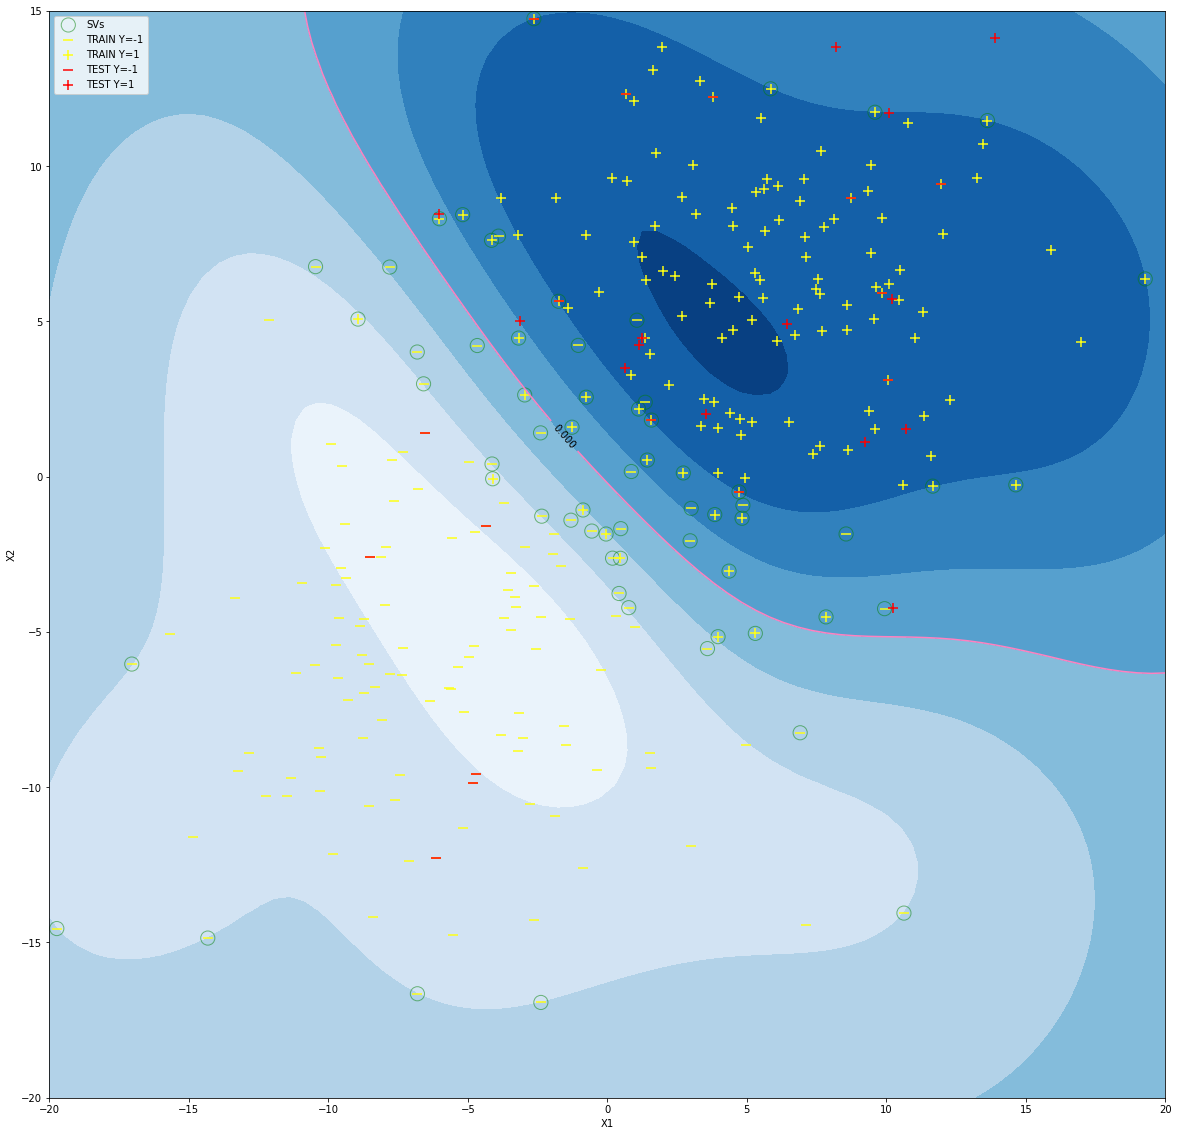

Accuracy on Training:
Accuracy = 93.3333% (252/270) (classification)

Accuracy on Test:
Accuracy = 100% (30/30) (classification)




RBF Kernel with sigma^2 = 128


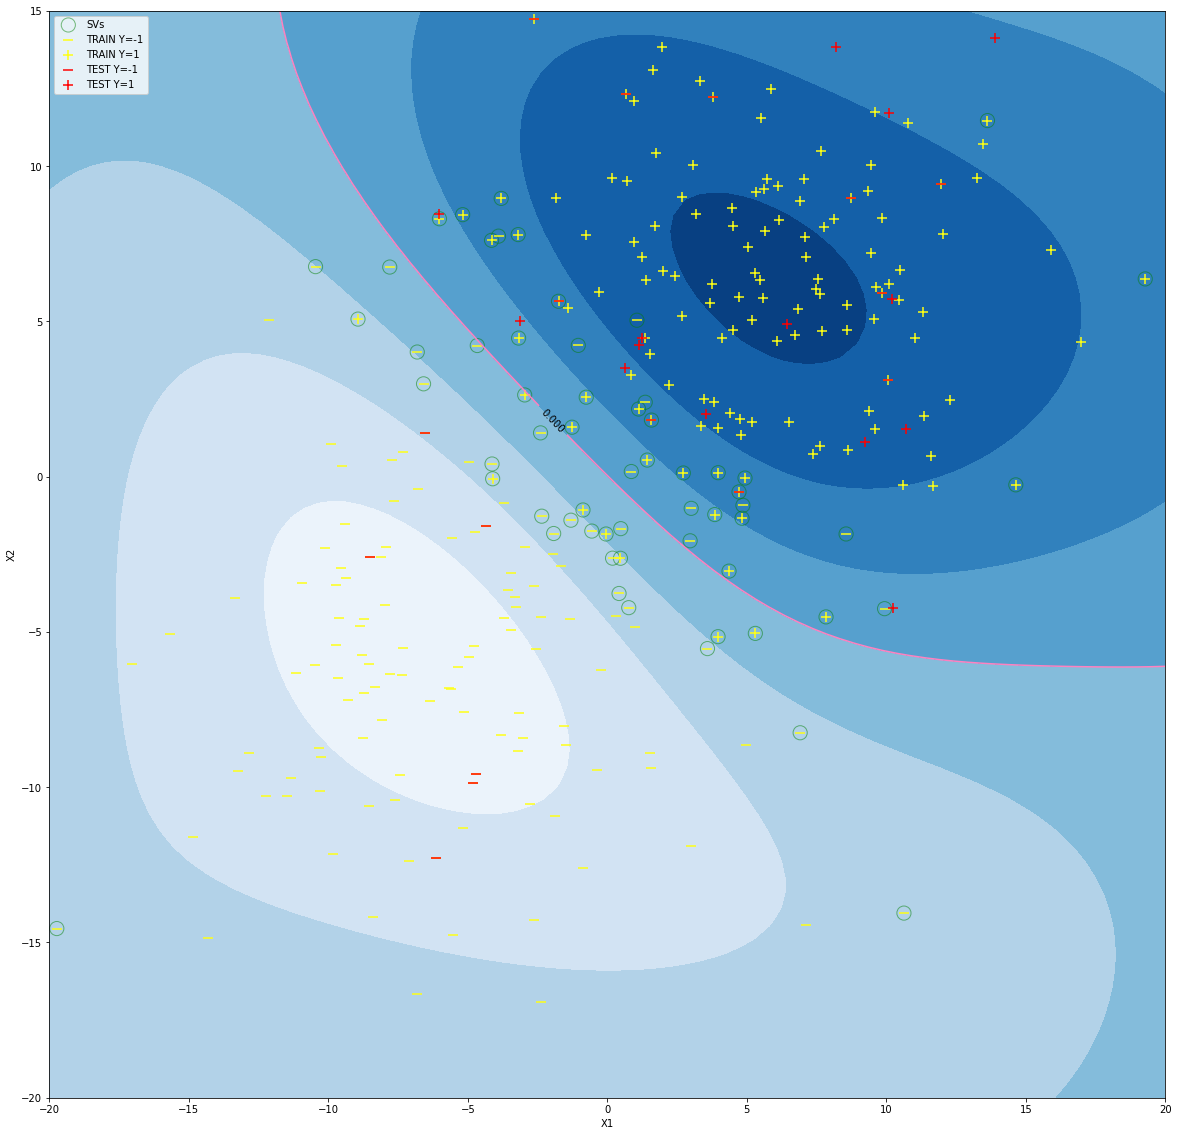

Accuracy on Training:
Accuracy = 93.3333% (252/270) (classification)

Accuracy on Test:
Accuracy = 100% (30/30) (classification)






In [5]:
for i in range(len(sigma_sqs)):
    print("RBF Kernel with sigma^2 = " + str(sigma_sqs[i]))
    num_supp_vecs[i] = drawer_rbf(sigma_sqs[i])
    print('\n\n')

Text(0.5, 0, 'sigma_sq (log)')

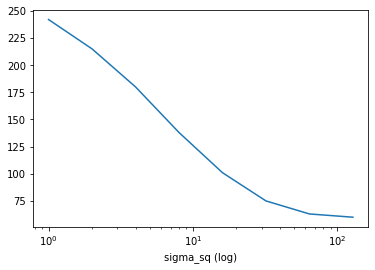

In [6]:
plt.plot(sigma_sqs, num_supp_vecs)
plt.xscale('log')
plt.xlabel('sigma_sq (log)')

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{5}$

The number of support vectors decreases as $\sigma^2$ goes up (by factors of 2). There is more overfitting when $sigma^2$ is small since we can see smaller test accuracy and higher training accuracy for those. We can also see that for larger $\sigma^2$, the contours are less squeezed on the data, and more generally ellipse shaped. As a result, we can see the decision boundary is relatively smoother for larger $\sigma^2$.

However, for larger $\sigma^2$, we can see that the training accuracy goes down, so there is probably underfitting happening, even though the test accuracy is still the same. It seems $\sigma^2 = 8$ has the best balance between the accuracies.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{6}$

In [7]:
# return polynomial kernel with c weighting between higher-degree and lower degree terms, and d as the degree
def polynomial(x, z, c, d):
    return (np.dot(x,z) + c)**d

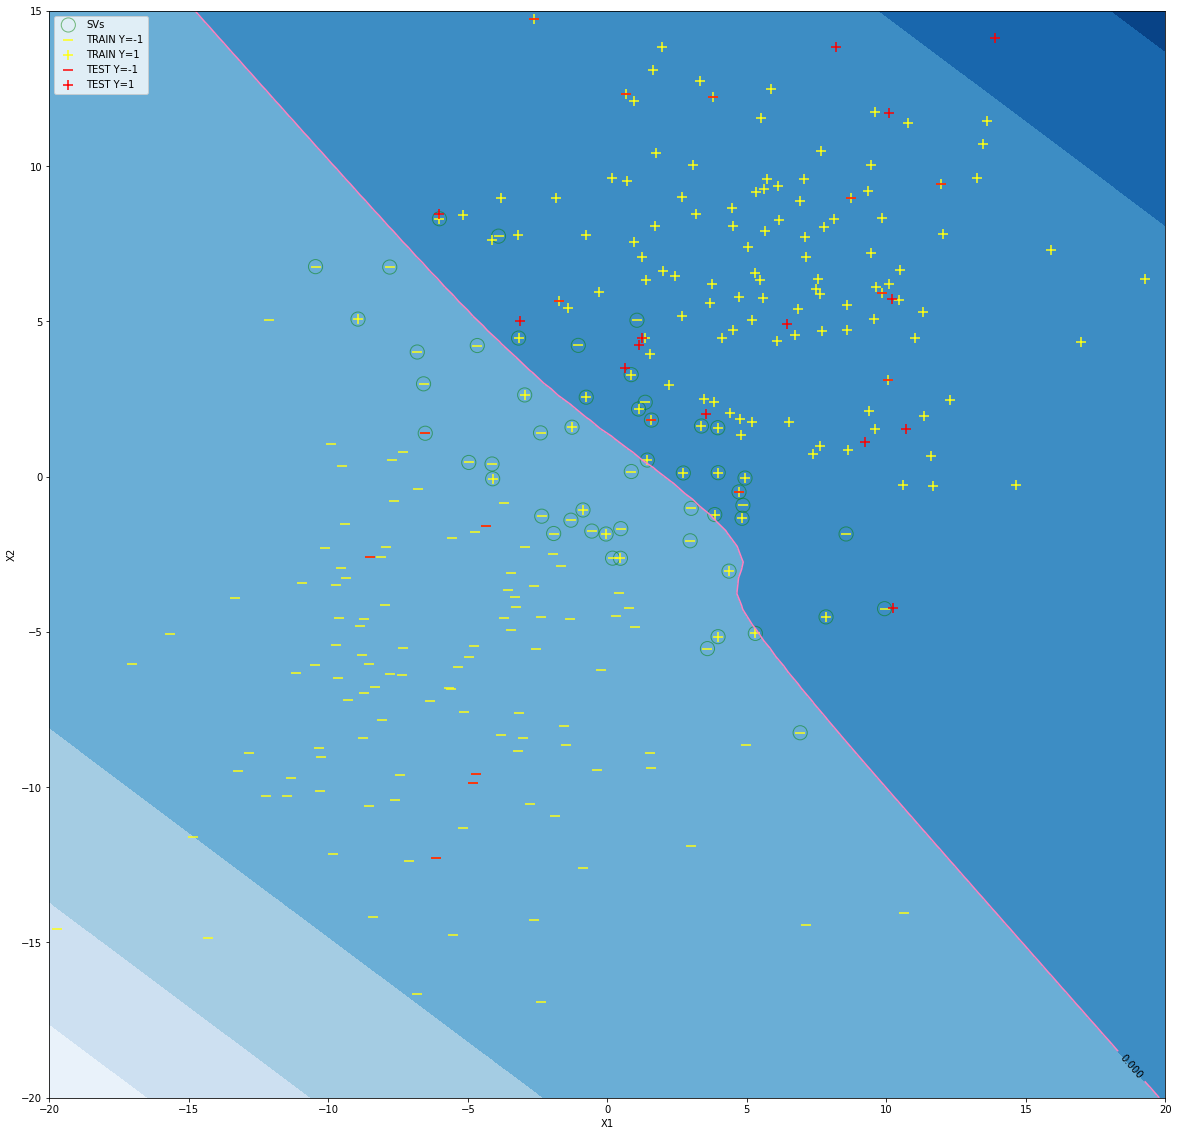

Accuracy on Training:
Accuracy = 90.7407% (245/270) (classification)

Accuracy on Test:
Accuracy = 96.6667% (29/30) (classification)



In [8]:
def drawer_poly(c, d):
    problem = svm_problem(Y_train, X_train)
    params = svm_parameter('-s 0 -t 1 -d '+str(d)+' -r '+str(c))
    m = svm_train(problem, params)

    # set intercept first
    cons = -m.rho.contents.value

    # get support vectors (the only points that have nonzero alpha)
    # make into array to compare
    supp_vecs = np.array([np.array([sv[i] for i in sv.keys()]) for sv in m.get_SV()])
    dual_coefs = np.array([alpha[0] for alpha in m.get_sv_coef()])

    # initialize f to be the constant at each grid point
    f = np.ones((len(X1_points), len(X2_points)))*cons

    # evaluate function at each point
    for i in range(len(supp_vecs)):
        for j in range(len(X1_points)):
            for k in range(len(X2_points)):
                x_vec = np.array([X1_points[j], X2_points[k]])
                f[j][k] = f[j][k] + dual_coefs[i]*polynomial(x_vec, supp_vecs[i], c, d)

    # not_sv = np.array(not_sv)
    # show non-supp-vecs on the plot, to be sure that they exist
    # not_sv = []
    # for x in X_train:
    #     if not (x in supp_vecs):
    #         not_sv.append(x)

    plt.figure(figsize=(20,20))
    plt.contourf(X1, X2, np.transpose(f), cmap='Blues')
    CS_zero = plt.contour(X1, X2, np.transpose(f), levels=0, colors='xkcd:pink')
    plt.scatter(supp_vecs[:,0], supp_vecs[:,1], marker='o', s=200, alpha = 0.5, edgecolors='g', facecolors='none', label='SVs')
    plt.clabel(CS_zero, CS_zero.levels, inline = True, colors = 'black')
    # plt.scatter(not_sv[:,0], not_sv[:,1], marker='o', s=200, edgecolors='tab:pink', facecolors='none', label='not SV')

    plt.scatter(X_train_neg[:,0], X_train_neg[:,1], c='xkcd:yellow', marker = "_", label='TRAIN Y=-1', s=100)
    plt.scatter(X_train_pos[:,0], X_train_pos[:,1], c='xkcd:yellow', marker = "+", label='TRAIN Y=1', s=100)
    plt.scatter(X_test_neg[:,0], X_test_neg[:,1], c='r', marker = "_", label='TEST Y=-1', s=100)
    plt.scatter(X_test_pos[:,0], X_test_pos[:,1], c='r', marker = "+", label='TEST Y=1', s=100)
    plt.legend(loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    print("Accuracy on Training:")
    train_pred_labels, p_acc, p_val = svm_predict(Y_train, X_train, m)
    train_acc, MSE, SCC = evaluations(Y_train, train_pred_labels)
    print()

    print("Accuracy on Test:")
    test_pred_labels, p_acc, p_val = svm_predict(Y_test, X_test, m)
    test_acc, MSE, SCC = evaluations(Y_test, test_pred_labels)
    print()
    
    return len(supp_vecs)


len_supp = drawer_poly(0,3)

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{Credit \; Card \; Dataset}$

$\large \mathbf{1}$

Accuracy on Test:
Accuracy = 85.6061% (113/132) (classification)

ROC Curve on Test:


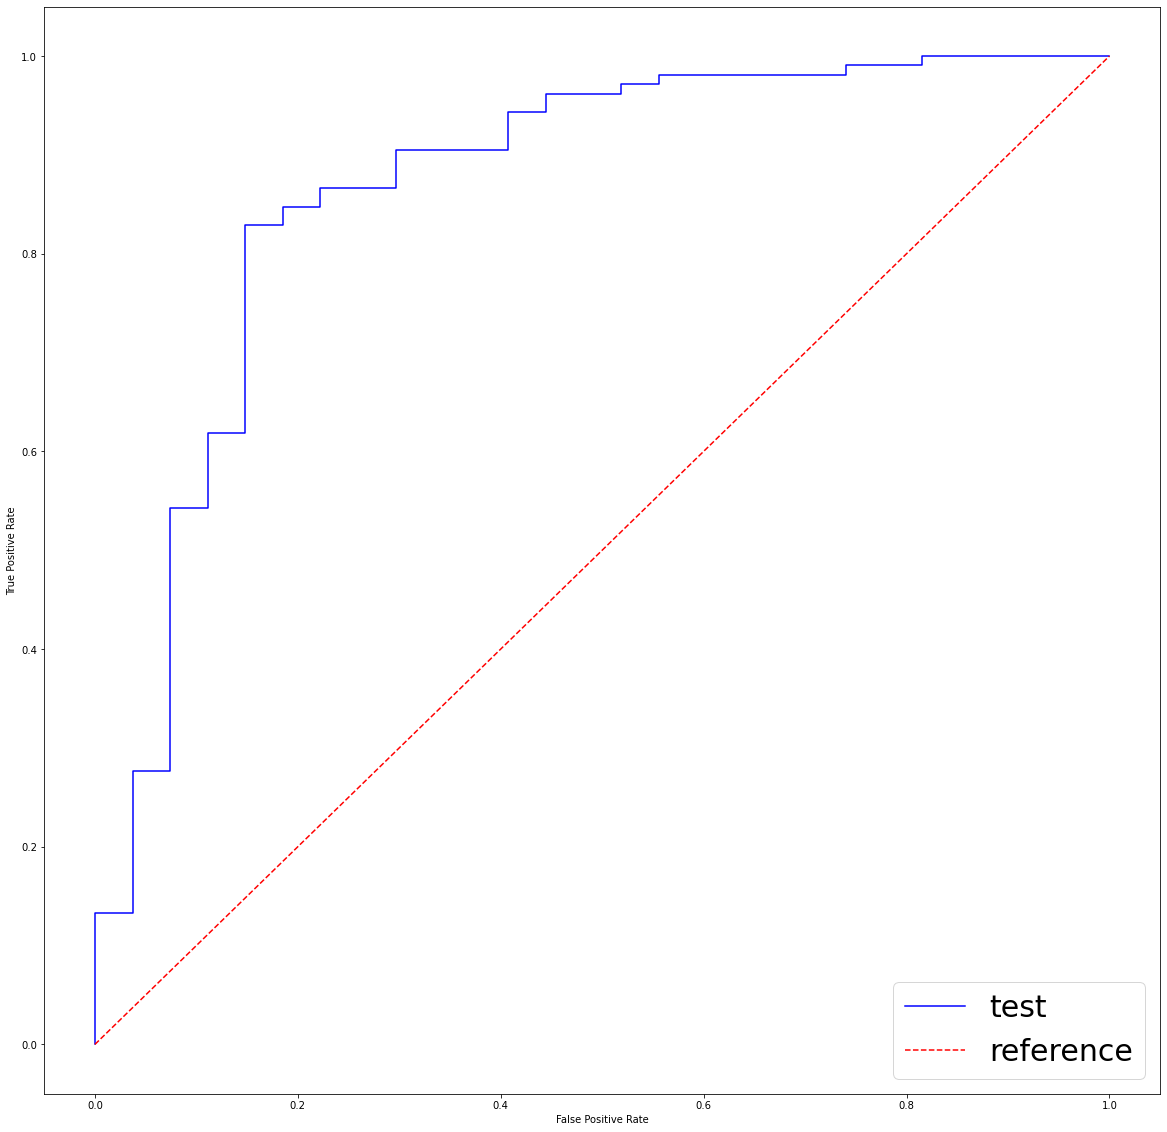

AUC on Test:
0.8673721340388008



In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd

df = pd.read_csv('../../Datasets/creditCard.csv')

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

problem = svm_problem(np.array(Y_train), np.array(X_train))
params = svm_parameter('-s 0 -t 1 -d 1 -r 0')
m = svm_train(problem, params)

print("Accuracy on Test:")
test_pred_labels, p_acc, p_val = svm_predict(np.array(Y_test), np.array(X_test), m)
test_acc, MSE, SCC = evaluations(np.array(Y_test), test_pred_labels)
print()

test_pred_vals = [val[0] for val in p_val]
print("ROC Curve on Test:")
plt.figure(figsize=(20,20))

# test roc
fpr, tpr, ts = roc_curve(np.array(Y_test), test_pred_vals)
plt.plot(fpr, tpr, label = 'test', c='blue')

# 45 degree for reference
plt.plot([0,1],[0,1], 'r--', label='reference')

plt.legend(loc = 'lower right', fontsize=30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("AUC on Test:")
print(roc_auc_score(np.array(Y_test), test_pred_vals))
print()

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{2}$

Accuracy on Training for sigma^2 = 5:
Accuracy = 97.0514% (1152/1187) (classification)

Accuracy on Test for sigma^2 = 5:
Accuracy = 79.5455% (105/132) (classification)

ROC Curve on Training and Test for sigma^2 = 5:


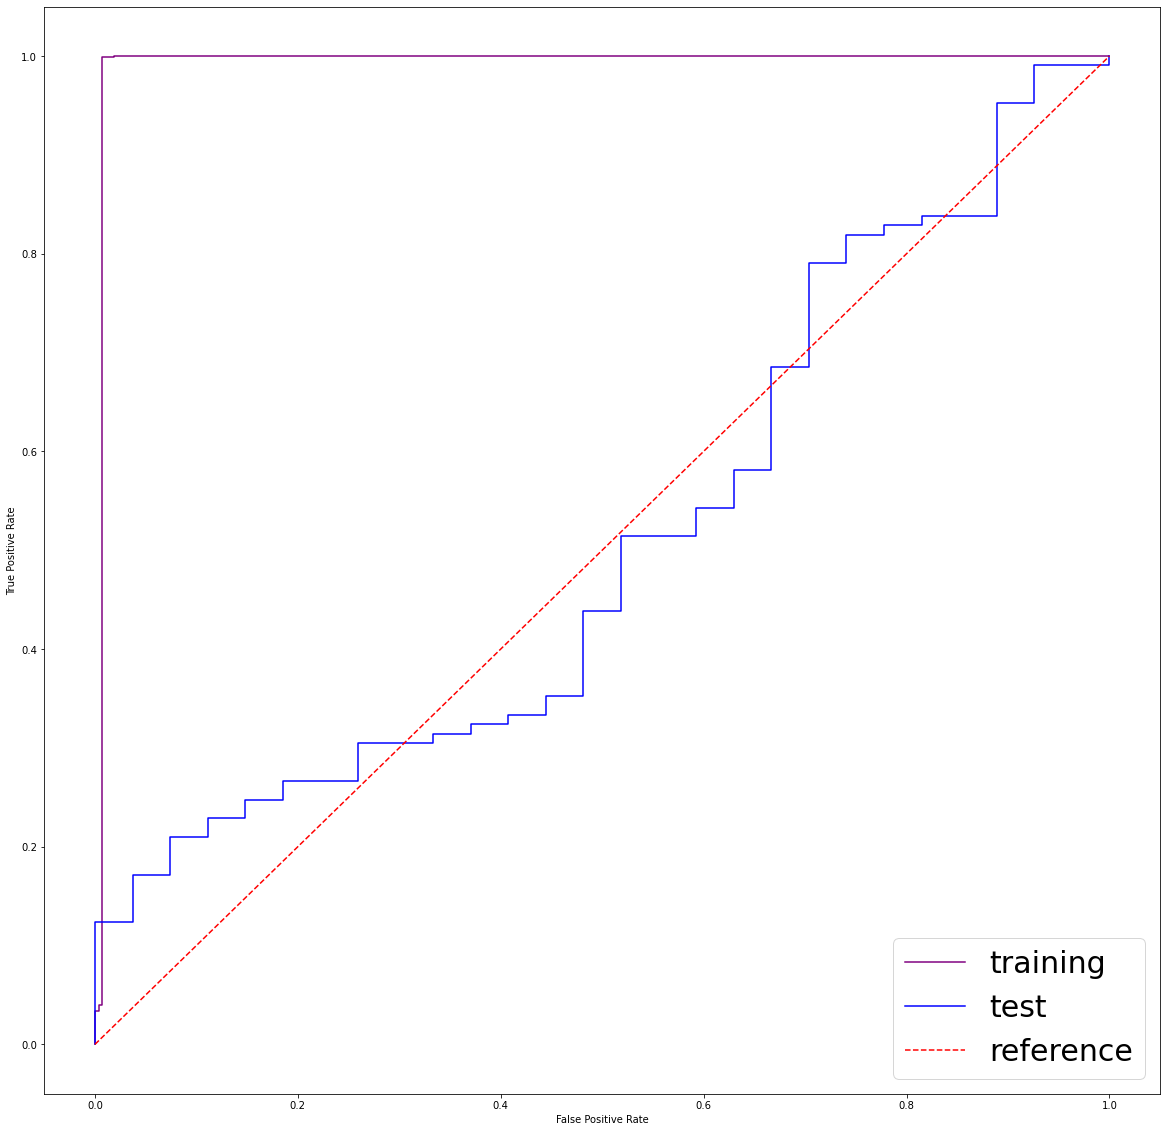

AUC on Training for sigma^2 = 5:
0.992828275465494

AUC on Test for sigma^2 = 5:
0.5100529100529101

Accuracy on Training for sigma^2 = 25:
Accuracy = 88.2898% (1048/1187) (classification)

Accuracy on Test for sigma^2 = 25:
Accuracy = 78.7879% (104/132) (classification)

ROC Curve on Training and Test for sigma^2 = 25:


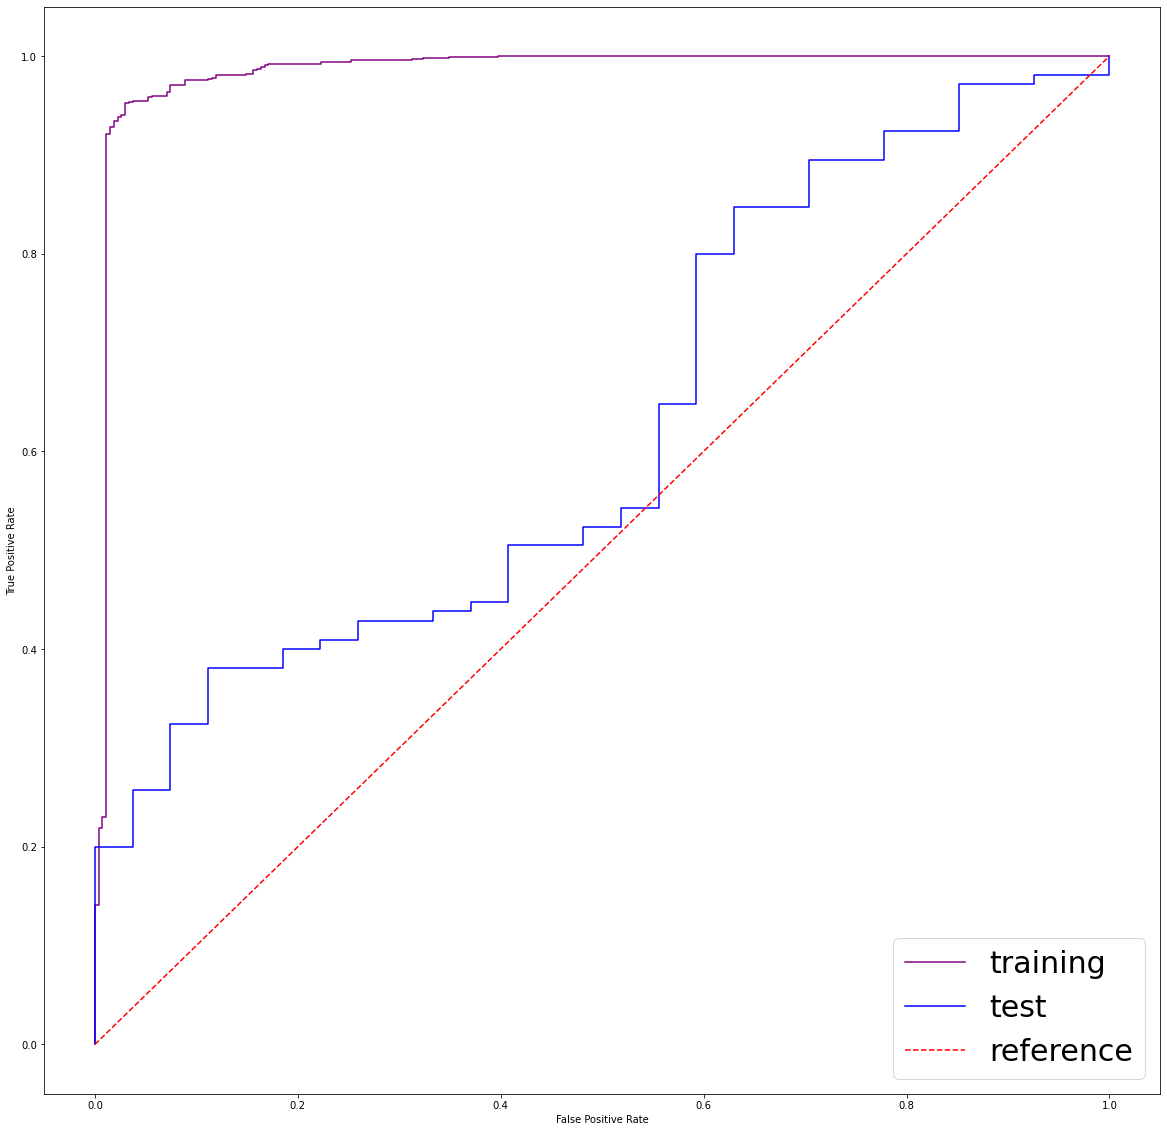

AUC on Training for sigma^2 = 25:
0.9848344955495621

AUC on Test for sigma^2 = 25:
0.6243386243386244



In [56]:
# model 1 with sigma^2 = 5
problem = svm_problem(np.array(Y_train), np.array(X_train))
params = svm_parameter('-s 0 -t 2 -g ' + str(1/5))
m1 = svm_train(problem, params)

print("Accuracy on Training for sigma^2 = 5:")
train_pred_labels, p_acc, p_val = svm_predict(np.array(Y_train), np.array(X_train), m1)
test_acc, MSE, SCC = evaluations(np.array(Y_test), test_pred_labels)
print()

# save predicted values for roc
train_pred_vals = [val[0] for val in p_val]

print("Accuracy on Test for sigma^2 = 5:")
test_pred_labels, p_acc, p_val = svm_predict(np.array(Y_test), np.array(X_test), m1)
test_acc, MSE, SCC = evaluations(np.array(Y_test), test_pred_labels)
print()

# save predicted values for roc
test_pred_vals = [val[0] for val in p_val]

print("ROC Curve on Training and Test for sigma^2 = 5:")
plt.figure(figsize=(20,20))

# training roc
fpr, tpr, ts = roc_curve(np.array(Y_train), train_pred_vals)
plt.plot(fpr, tpr, label = 'training', c='purple')

# test roc
fpr, tpr, ts = roc_curve(np.array(Y_test), test_pred_vals)
plt.plot(fpr, tpr, label = 'test', c='blue')

# 45 degree for reference
plt.plot([0,1],[0,1], 'r--', label='reference')

plt.legend(loc = 'lower right', fontsize=30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("AUC on Training for sigma^2 = 5:")
print(roc_auc_score(np.array(Y_train), train_pred_vals))
print()

print("AUC on Test for sigma^2 = 5:")
print(roc_auc_score(np.array(Y_test), test_pred_vals))
print()

# model 2 with sigma^2 = 25
problem = svm_problem(np.array(Y_train), np.array(X_train))
params = svm_parameter('-s 0 -t 2 -g ' + str(1/25))
m2 = svm_train(problem, params)

print("Accuracy on Training for sigma^2 = 25:")
train_pred_labels, p_acc, p_val = svm_predict(np.array(Y_train), np.array(X_train), m2)
test_acc, MSE, SCC = evaluations(np.array(Y_test), test_pred_labels)
print()

# save predicted values for roc
train_pred_vals = [val[0] for val in p_val]

print("Accuracy on Test for sigma^2 = 25:")
test_pred_labels, p_acc, p_val = svm_predict(np.array(Y_test), np.array(X_test), m2)
test_acc, MSE, SCC = evaluations(np.array(Y_test), test_pred_labels)
print()

# save predicted values for roc
test_pred_vals = [val[0] for val in p_val]

print("ROC Curve on Training and Test for sigma^2 = 25:")
plt.figure(figsize=(20,20))

# training roc
fpr, tpr, ts = roc_curve(np.array(Y_train), train_pred_vals)
plt.plot(fpr, tpr, label = 'training', c='purple')

# test roc
fpr, tpr, ts = roc_curve(np.array(Y_test), test_pred_vals)
plt.plot(fpr, tpr, label = 'test', c='blue')

# 45 degree for reference
plt.plot([0,1],[0,1], 'r--', label='reference')

plt.legend(loc = 'lower right', fontsize=30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("AUC on Training for sigma^2 = 25:")
print(roc_auc_score(np.array(Y_train), train_pred_vals))
print()

print("AUC on Test for sigma^2 = 25:")
print(roc_auc_score(np.array(Y_test), test_pred_vals))
print()

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{3.2} \quad \text{Clustering}$

$\large \mathbf{1}$

Original image:


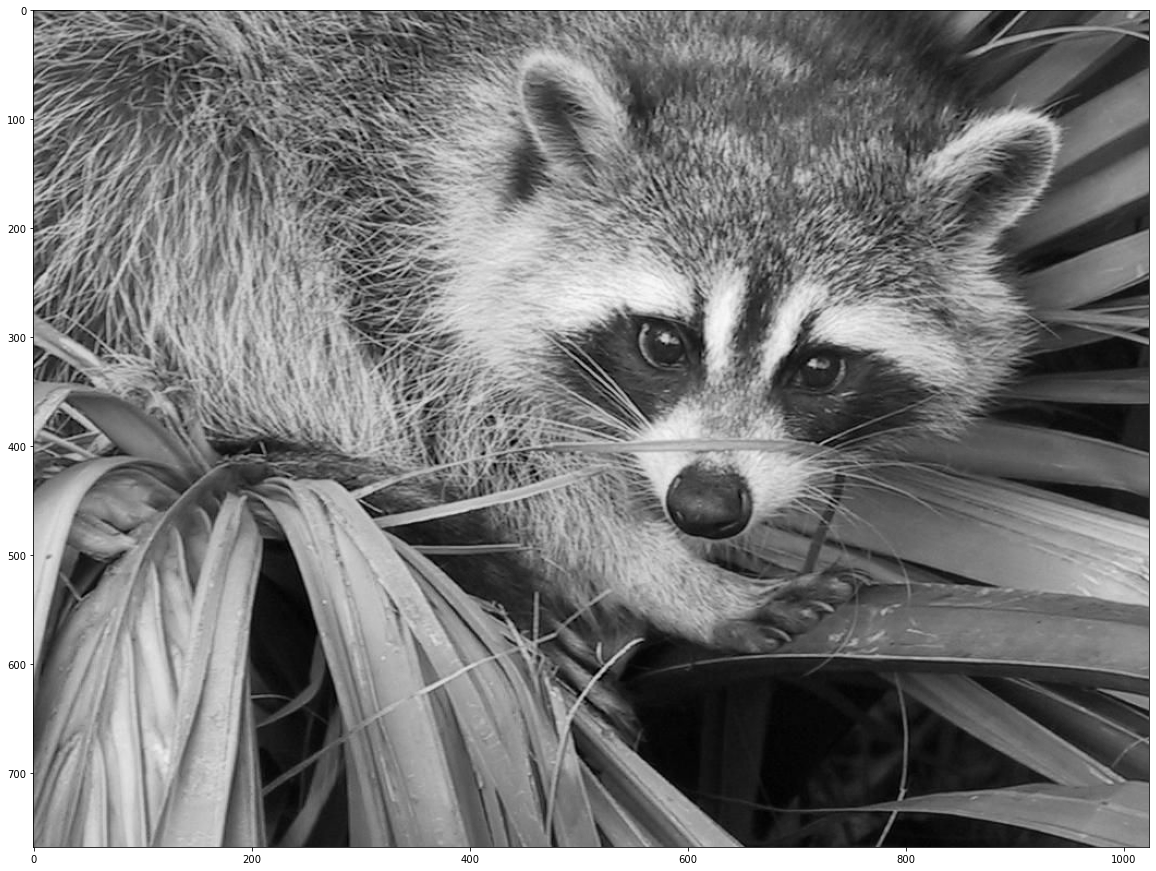

In [41]:
from numpy.random import rand

rac_image = plt.imread('./raccoon.png')
print("Original image:")
plt.figure(figsize=(20,20))
plt.imshow(rac_image,cmap='gray',vmin='0', vmax='1')
plt.show()

In [42]:
points = np.reshape(rac_image, (rac_image.shape[0]*rac_image.shape[1]))
print(points.shape)

(786432,)


In [91]:
def cluster2(clusters, image, max_iterations):
    # turn array into 1d
    points = np.reshape(image, (image.shape[0]*image.shape[1], 1))
    
    # randomly assign centers
    centers = np.array([points[math.floor(rand(1)*len(points))][0] for x in range(clusters)])
    
    # run for max_iterations
    iters = max_iterations
    
    while iters > 0:
        # go through each cluster and minimize the distance to the nearest center
        assignments = [np.argmin((centers - points[i])**2) for i in range(len(points))]
        
        # for each center, recalculate to find mean of center
        old_centers = np.copy(centers)
        for x in range(clusters):
            s = sum(points[i] for i in range(len(points)) if assignments[i] == x)
            n = assignments.count(x)
            
            centers[x] = float(s/n) if n != 0 else centers[x]
        
        # decrement to end loop eventually
        iters -= 1
        
        if (norm(old_centers-centers) < 0.1):
            break
    
    return centers, assignments

In [65]:
def cluster(k, image, max_iterations):
    # turn array into 1d
    points = np.reshape(image, image.shape[0]*image.shape[1])
    
    # randomly assign each point to a cluster
    assignments = [math.floor(rand(1)*k) for i in points]
    
    # randomly assign centers
    centers = [points[math.floor(rand(1)*len(points))] for x in range(k)]
    
    # run for max_iterations
    iters = max_iterations
    
    while iters > 0:
        # vector of distances for each point from each center
        dist_vecs = np.array([[norm(point-mean) for mean in centers] for point in points])
        
        # go through each cluster and minimize the distance to the nearest center
        assignments = [np.argmin(dist_vecs[i]) for i in range(len(points))]
        
        # for each center, recalculate to find mean of center
        for x in range(k):
            # store sum for this cluster
            sum = 0
            num = 0
            
            for i in range(len(points)):
                if (assignments[i] == x):
                    sum += points[i]
                    num += 1
            
            # update center to new mean of cluster
            if num != 0:
                centers[x] = float(sum/num)
        
        # decrement to end loop eventually
        iters -= 1
    
    return centers, assignments

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \mathbf{2}$

[0.2459575630580536, 0.604912537907309]
Compressed image with k = 2 clusters


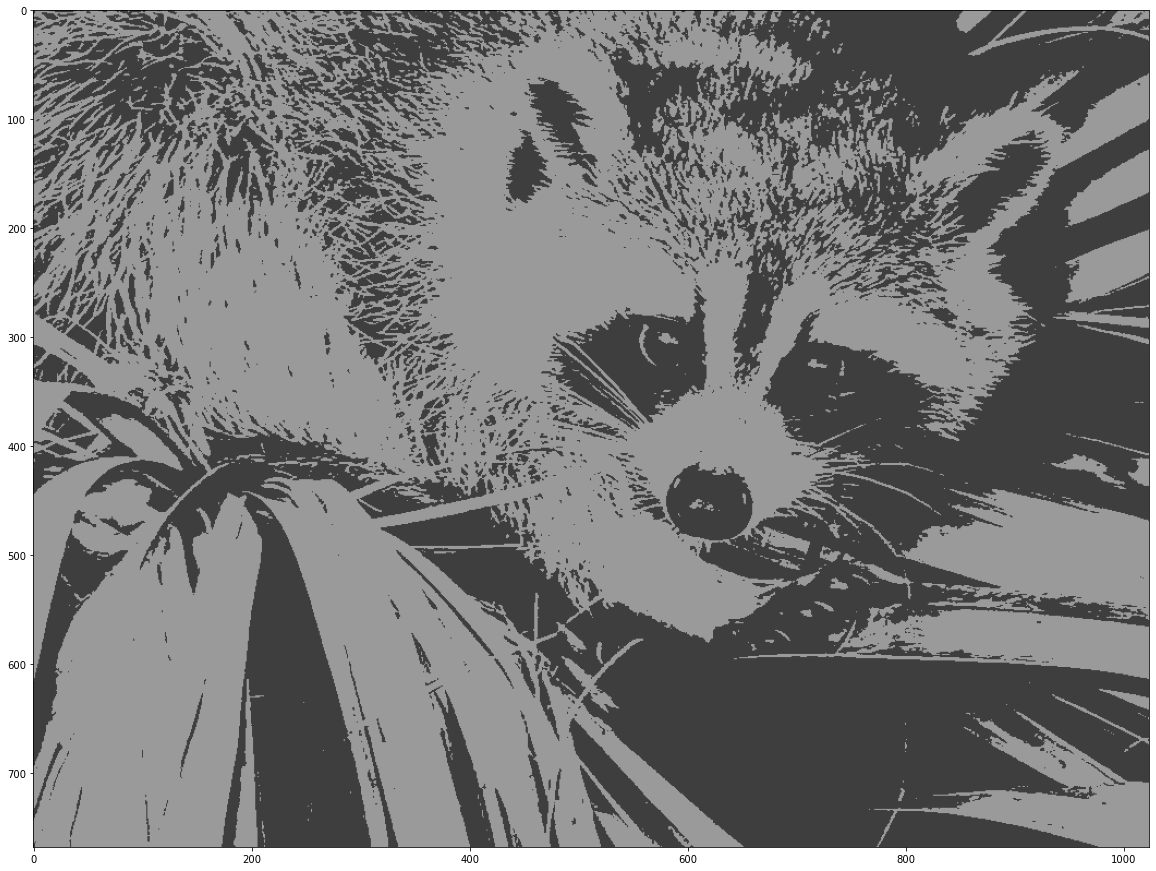

[0.14395762959439296, 0.7366542856818944, 0.3669280448240838, 0.5472427275480176]
Compressed image with k = 4 clusters


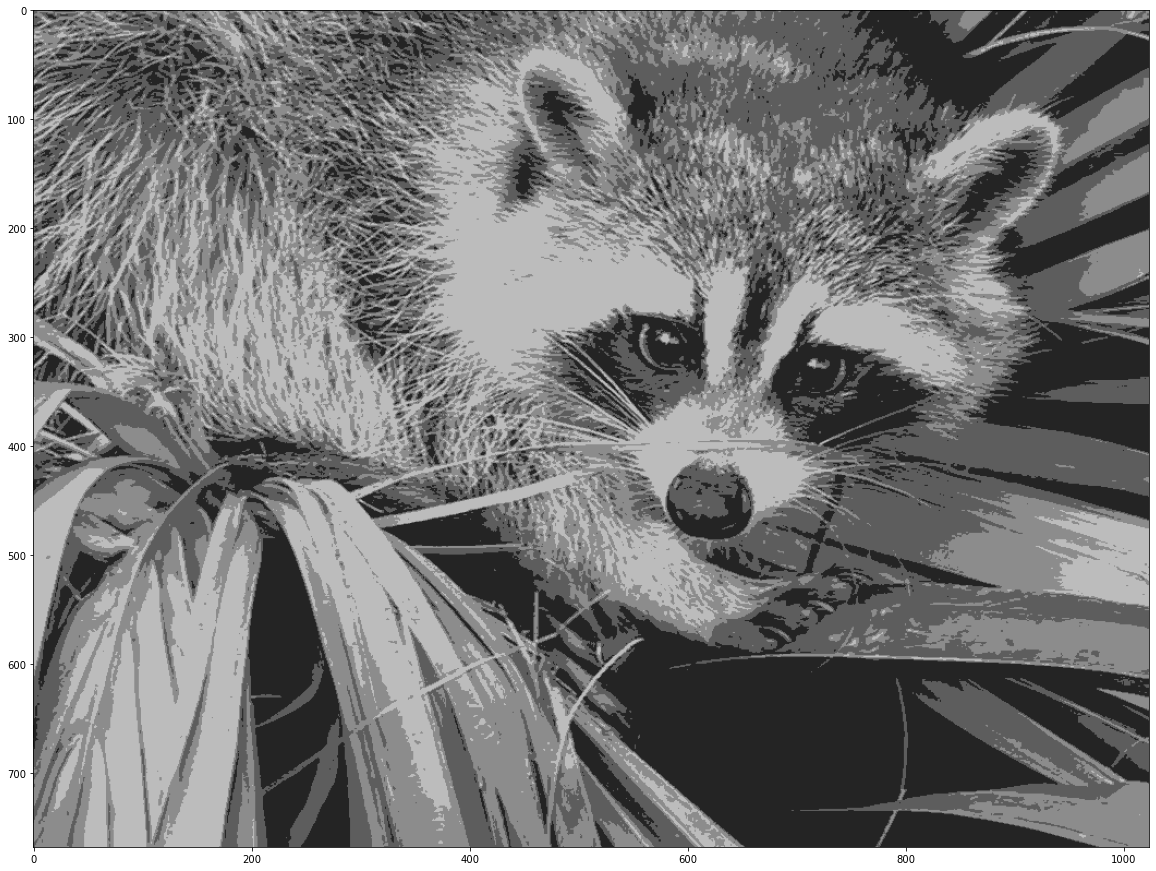

[0.4744782191969283, 0.6477226425383009, 0.8313856564323251, 0.10242016554495974, 0.3794627241018736, 0.26417308583882615, 0.7350853532558799, 0.5614635500437813]
Compressed image with k = 8 clusters


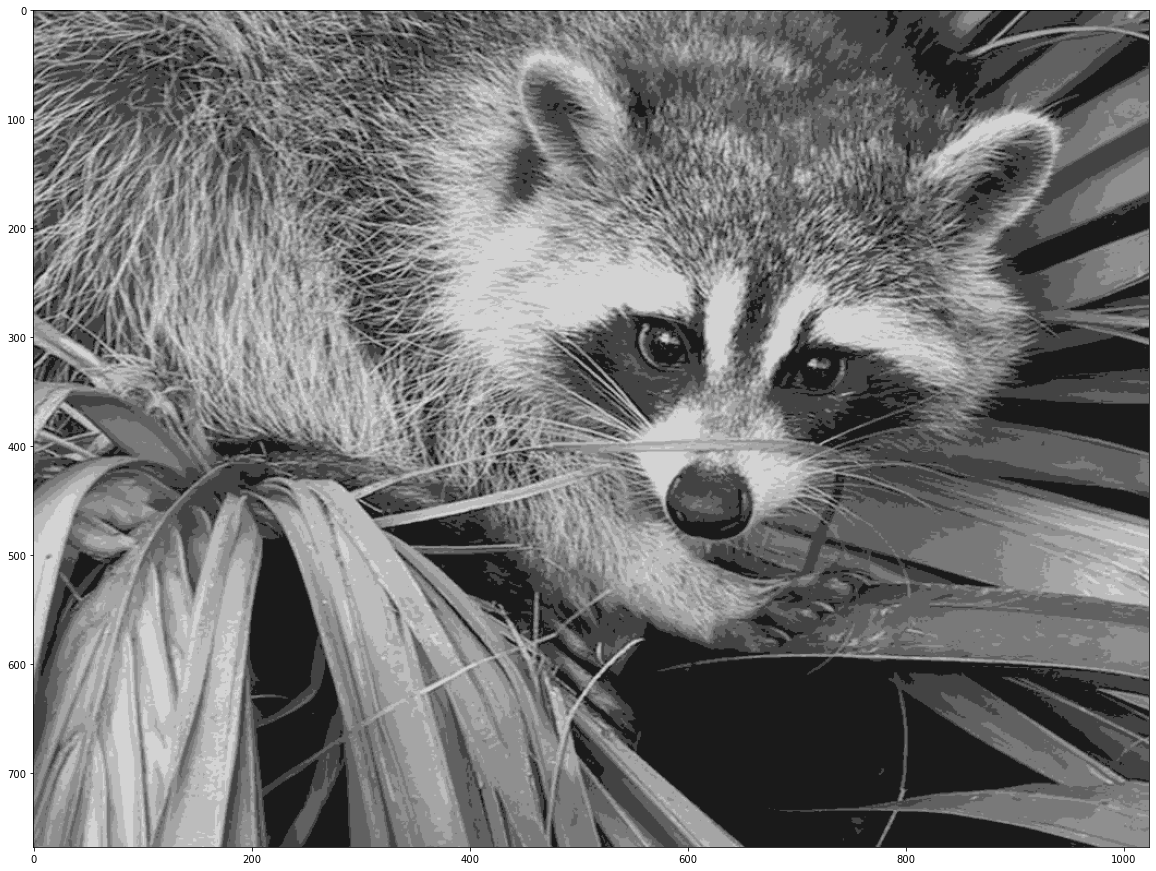

[0.4255146065961967, 0.48620927736019265, 0.6880268525481639, 0.5585100778670453, 0.3648145014991091, 0.517558117178263, 0.2610557804298032, 0.08286592214024104, 0.33938048531736104, 0.3178950695957847, 0.7962650217669932, 0.4569685356825897, 0.3942255322683226, 0.19537158051891398, 0.29615959702500033, 0.6137331695087607]
Compressed image with k = 16 clusters


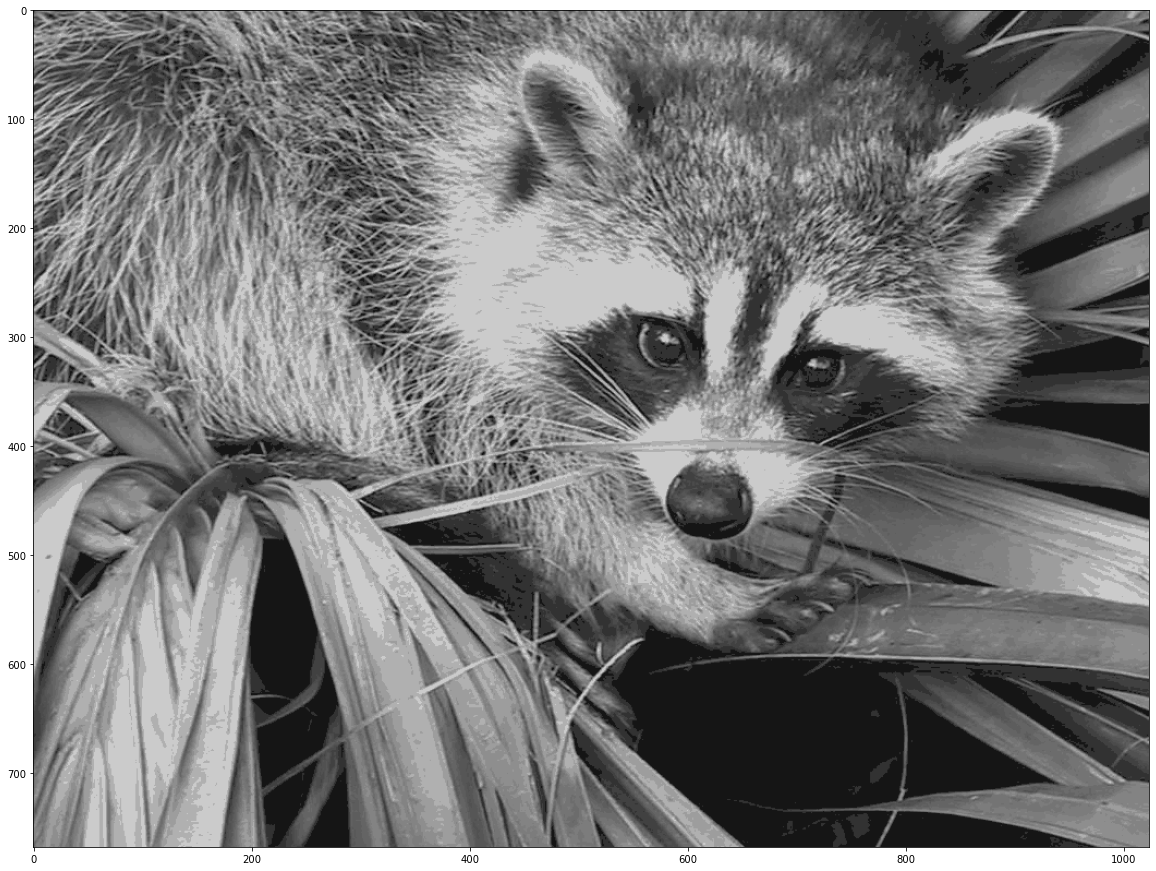

[0.6526034105951823, 0.372672354081292, 0.23167518573297857, 0.5626045060983473, 0.03277758141875982, 0.7407033098471313, 0.10727701317636897, 0.32753193846512785, 0.5921031705377139, 0.693607112180953, 0.04960972748387707, 0.8729419542373494, 0.1352421931636628, 0.45105132296441, 0.2024335952089126, 0.5019053434125574, 0.3099777203457407, 0.42357877435885927, 0.1687967044008929, 0.6196585628922902, 0.3961760549729927, 0.06704632015607402, 0.2548722198402691, 0.3411995007901745, 0.7957015053161586, 0.47651287811775483, 0.020319899535234227, 0.5311826770923224, 0.2902210296960889, 0.3548263420166091, 0.08603594401648909, 0.2725633473932638]
Compressed image with k = 32 clusters


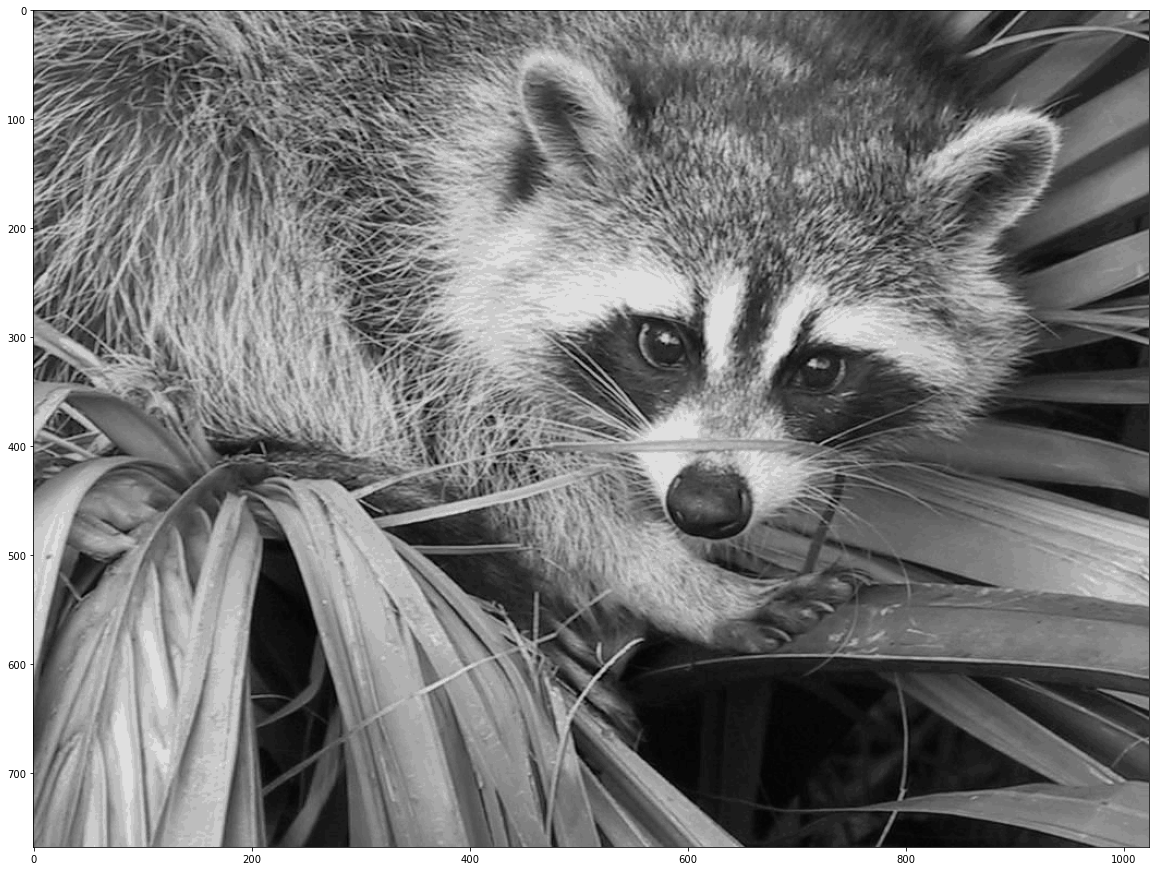

In [60]:
for k in range(1,6):
    cens, assigns = cluster(2**k, rac_image, 5)

    print(cens)

    # create compressed image using assignments
    compressed = []

    for a in assigns:
        compressed.append(cens[a])

    # reshape back into original image
    compressed = np.reshape(compressed, (rac_image.shape[0], rac_image.shape[1]))

    print("Compressed image with k = " + str(2**k) + " clusters")
    plt.figure(figsize=(20,20))
    plt.imshow(compressed,cmap='gray',vmin='0', vmax='1')
    plt.show()

The compressed images definitely resemble the original image pretty well. The case with $k = 2$ has a very washed out picture (it seems to latch on to two grays, usually one around $0.27$ and the other around $0.62$). With $k = 4$, the compression is already quite good. As we can see, when we increase $k$ the image becomes a very good compression, although my algorithm runs much slower for large $k$ (as expected).